# Book Reviewer Rankings

The purpose of this Jupyter Notebook is to examine book reviews and to find a way of ranking reviewers. I researched book reviews online and discovered the following dataset courtesty of Julian McAuley, UCSC: 

http://jmcauley.ucsd.edu/data/amazon/

I downloaded a subset of "Books" that consists of 8.9 million reviews.

## Open Amazon Books Json File

In [3]:
import pandas as pd
import json

with open('reviews_Books_5.json', 'r') as f:
    reviews = f.readlines()

This took a long time due to the size of the file.

In [208]:
reviews[0:5]

['{"reviewerID": "A10000012B7CGYKOMPQ4L", "asin": "000100039X", "reviewerName": "Adam", "helpful": [0, 0], "reviewText": "Spiritually and mentally inspiring! A book that allows you to question your morals and will help you discover who you really are!", "overall": 5.0, "summary": "Wonderful!", "unixReviewTime": 1355616000, "reviewTime": "12 16, 2012"}\n',
 '{"reviewerID": "A2S166WSCFIFP5", "asin": "000100039X", "reviewerName": "adead_poet@hotmail.com \\"adead_poet@hotmail.com\\"", "helpful": [0, 2], "reviewText": "This is one my must have books. It is a masterpiece of spirituality. I\'ll be the first to admit, its literary quality isn\'t much. It is rather simplistically written, but the message behind it is so powerful that you have to read it. It will take you to enlightenment.", "overall": 5.0, "summary": "close to god", "unixReviewTime": 1071100800, "reviewTime": "12 11, 2003"}\n',
 '{"reviewerID": "A1BM81XB4QHOA3", "asin": "000100039X", "reviewerName": "Ahoro Blethends \\"Seriousl

Printing out the first five reviews reveals a list of dictonaries separated by '/n'.

### Eliminate /n

In [5]:
data = [json.loads(item.strip('\n')) for item in reviews]

In [209]:
data[0:5]

[{'asin': '000100039X',
  'helpful': [0, 0],
  'overall': 5.0,
  'reviewText': 'Spiritually and mentally inspiring! A book that allows you to question your morals and will help you discover who you really are!',
  'reviewTime': '12 16, 2012',
  'reviewerID': 'A10000012B7CGYKOMPQ4L',
  'reviewerName': 'Adam',
  'summary': 'Wonderful!',
  'unixReviewTime': 1355616000},
 {'asin': '000100039X',
  'helpful': [0, 2],
  'overall': 5.0,
  'reviewText': "This is one my must have books. It is a masterpiece of spirituality. I'll be the first to admit, its literary quality isn't much. It is rather simplistically written, but the message behind it is so powerful that you have to read it. It will take you to enlightenment.",
  'reviewTime': '12 11, 2003',
  'reviewerID': 'A2S166WSCFIFP5',
  'reviewerName': 'adead_poet@hotmail.com "adead_poet@hotmail.com"',
  'summary': 'close to god',
  'unixReviewTime': 1071100800},
 {'asin': '000100039X',
  'helpful': [0, 0],
  'overall': 5.0,
  'reviewText': 'Thi

I eliminated '/n' and confirmed the elimination by printing out the first fime entires under data.

### Convert to DataFrame

In [7]:
df = pd.DataFrame(data)

In [10]:
df.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,000100039X,"[0, 0]",5.0,Spiritually and mentally inspiring! A book tha...,"12 16, 2012",A10000012B7CGYKOMPQ4L,Adam,Wonderful!,1355616000
1,000100039X,"[0, 2]",5.0,This is one my must have books. It is a master...,"12 11, 2003",A2S166WSCFIFP5,"adead_poet@hotmail.com ""adead_poet@hotmail.com""",close to god,1071100800
2,000100039X,"[0, 0]",5.0,This book provides a reflection that you can a...,"01 18, 2014",A1BM81XB4QHOA3,"Ahoro Blethends ""Seriously""",Must Read for Life Afficianados,1390003200
3,000100039X,"[0, 0]",5.0,I first read THE PROPHET in college back in th...,"09 27, 2011",A1MOSTXNIO5MPJ,Alan Krug,Timeless for every good and bad time in your l...,1317081600
4,000100039X,"[7, 9]",5.0,A timeless classic. It is a very demanding an...,"10 7, 2002",A2XQ5LZHTD4AFT,Alaturka,A Modern Rumi,1033948800


df.head() reveals the data. I am particularly interested in the 'helpful' and 'overall' columns.

In [11]:
df.shape

(8898041, 9)

In [8]:
df.to_csv('Amazon_Data_Frame.csv')

I saved the data frame to a csv file for future reference.

# Explore Columns

In [14]:
df.overall.mean()

4.2499322041784255

In [16]:
df.overall.median()

5.0

I personally find it stunning that the median review score is 5.0! The mean review score of 4.25 indicates a left skewed distribution.

In [26]:
df.describe()

,overall,unixReviewTime
count,8.898041e+06,8.898041e+06
mean,4.249932e+00,1.320212e+09
std,1.057733e+00,1.018516e+08
min,1.000000e+00,8.325504e+08
25%,4.000000e+00,1.296864e+09
50%,5.000000e+00,1.362182e+09
75%,5.000000e+00,1.385942e+09
max,5.000000e+00,1.406074e+09


75% of reviewers giving a scoredof 4.0 or higher is telling

### Explore Column Types

In [19]:
type(df.helpful[0])

list

In [23]:
type(df.helpful[0][0])

int

The helpful column is a list of ints, as expected. It is presumably [helpfulVotes, totalVotes]. I know that Amazon only shows helpfulVotes on their website.

In [20]:
type(df.reviewTime[0])

str

I was not expecting the reviewTime to be a string.

In [21]:
type(df.unixReviewTime[0])

numpy.int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8898041 entries, 0 to 8898040
Data columns (total 9 columns):
asin              object
helpful           object
overall           float64
reviewText        object
reviewTime        object
reviewerID        object
reviewerName      object
summary           object
unixReviewTime    int64
dtypes: float64(1), int64(1), object(7)
memory usage: 611.0+ MB


# Graph Preliminary Data

In [27]:
 import matplotlib.pyplot as plt

## Overall Review Score Box Plot

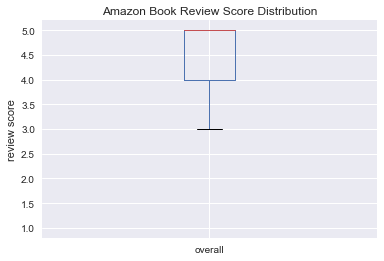

In [213]:
df.plot(y='overall', kind='box')
plt.ylabel('review score')
plt.title('Amazon Book Review Score Distribution')
plt.show()

Even though there are only 5 possible review scores, 2.0 and 1.0 are outliers! This is the definition of a top-heavy box. (I don't know if that's a real term.) 

## Overall Review Score Histogram

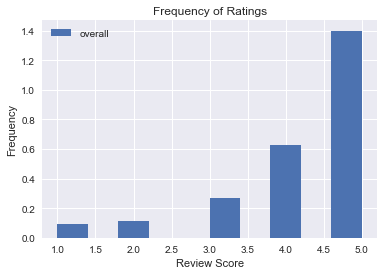

In [328]:
df.plot(y='overall', kind='hist', normed=True)
plt.xlabel('Review Score')
plt.title('Frequency of Ratings')
plt.show()

The tops of the bars seem to make a nice curve. The histogram reinforces a top-heavy rating system.

## Overall ECDF

In [317]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

Text(0.5,1,'Frequency of Ratings')

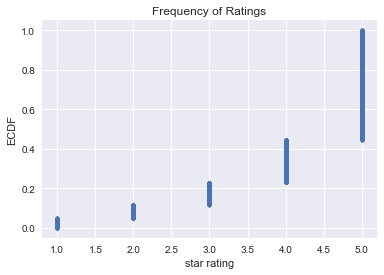

In [327]:
# Compute ECDF for star rating
x, y = ecdf(df_sub.overall)

# Generate plot
plt.plot(x, y, marker='.', linestyle='none')

# Label the axes
plt.xlabel('star rating')
plt.ylabel('ECDF')
plt.title('Frequency of Ratings')

The ECDF is a little more telling that the histogram. The total percentage of each rating is more clear.

# Explore 'Helpful' Column

Converting a column of lists into usable data was trickier than expected. I used Stack Overflow and Springboard mentors to smooth out the process. I started with np_arrays.

## Compute 'Helpful' Percentage: 100 data points

In [218]:
import numpy as np

#these arrays will be populated with the first and second member of the helpful column
helpfulVotes = []
totalVotes = []

#iterrows is used to loop through each row
for item, row in df[:100].iterrows():
    helpfulVotes.append(row['helpful'][0])
    totalVotes.append(row['helpful'][1])
    
#converting to an np.array to leverage speed and built-in functions
np_helpfulVotes = np.array(helpfulVotes)
np_totalVotes = np.array(totalVotes)

#add up the lenghts of each array
helpfulVotes_sum = np_helpfulVotes.sum()
totalVotes_sum = np_totalVotes.sum()
print('Helpful Votes:', helpfulVotes_sum)
print('Total Votes:', totalVotes_sum)

Helpful Votes: 203
Total Votes: 283


In [222]:
#finally, generate the total percentage
percentage_helpful = helpfulVotes_sum/totalVotes_sum
print('Percentage of Helpful Votes:', percentage_helpful)

Percentage of Helpful Votes: 0.7426197720523914


## Compute 'Helpful' Percentage: all data points

I repeate the same process, this time for the entire DatFrame.

In [221]:
helpfulVotes = []
totalVotes = []

for item, row in df.iterrows():
    helpfulVotes.append(row['helpful'][0])
    totalVotes.append(row['helpful'][1])
np_helpfulVotes = np.array(helpfulVotes)
np_totalVotes = np.array(totalVotes)

helpfulVotes_sum = np_helpfulVotes.sum()
totalVotes_sum = np_totalVotes.sum()

print('Helpful Votes:', helpfulVotes_sum)
print('Total Votes:', totalVotes_sum)

percentage_helpful = helpfulVotes_sum/totalVotes_sum
print('Percentage of Helpful Votes:', percentage_helpful)

Helpful Votes: 26763522
Total Votes: 36039334
Percentage of Helpful Votes: 0.7426197720523914


## Compute 'Helpful' Percentage: 10000 data points

Since the above calculation took so long, I decided to switch to a smaller subset for general testing.

In [19]:
df_sub = df[:10000]

I ran the same test again. I really should turn this into a function. It's never a good idea to copy and past once, let alone twice. (I was thinking of using the separate arrays later.)

In [223]:
sub_helpfulVotes = []
sub_totalVotes = []

for item, row in df_sub.iterrows():
    sub_helpfulVotes.append(row['helpful'][0])
    sub_totalVotes.append(row['helpful'][1])
np_sub_helpfulVotes = np.array(sub_helpfulVotes)
np_sub_totalVotes = np.array(sub_totalVotes)

sub_helpfulVotes_sum = np_sub_helpfulVotes.sum()
sub_totalVotes_sum = np_sub_totalVotes.sum()

print('Helpful Votes:', sub_helpfulVotes_sum)
print('Total Votes:', sub_totalVotes_sum)

sub_percentage_helpful = sub_helpfulVotes_sum/sub_totalVotes_sum
print('Percentage of Helpful Votes:', sub_percentage_helpful)

Helpful Votes: 42103
Total Votes: 62072
Percentage of Helpful Votes: 0.6782929501224385


## Display Percentage of Helpful Votes Scatter Plot

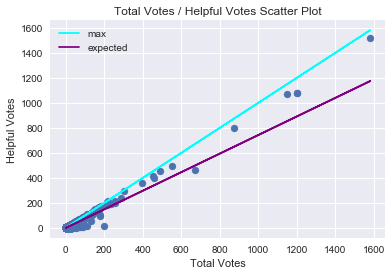

In [245]:
y = np_sub_helpfulVotes
x = np_sub_totalVotes

plt.ylabel('Helpful Votes')
plt.xlabel('Total Votes')
plt.title('Total Votes / Helpful Votes Scatter Plot')

plt.scatter(x,y)

#Since helpful votes cannot exceed total votes, the cyan line represents a maximum. 
#All dots must be underneath the line
maxLine, = plt.plot(x, x, 'cyan', label='max')

#The purple line is the expected value of helpful votes
expectedLine, = plt.plot(x, percentage_helpful*x, 'purple', label='expected')

plt.legend(handles=[maxLine, expectedLine])
plt.show()

This is beautifully linear!! Data points with lots of votes are generally more helpful than expected. 

### Zoom in on Total Votes

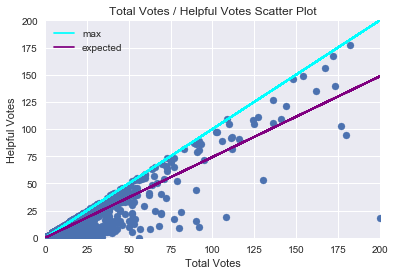

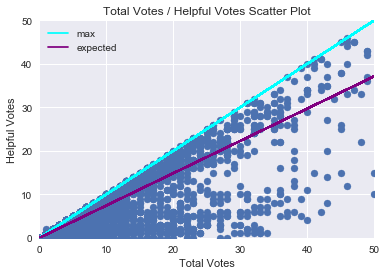

In [332]:
y = np_sub_helpfulVotes
x = np_sub_totalVotes

plt.ylabel('Helpful Votes')
plt.xlabel('Total Votes')
plt.title('Total Votes / Helpful Votes Scatter Plot')

plt.scatter(x,y)

#Since helpful votes cannot exceed total votes, the cyan line represents a maximum. 
#All dots must be underneath the line
maxLine, = plt.plot(x, x, 'cyan', label='max')

#The purple line is the expected value of helpful votes
expectedLine, = plt.plot(x, percentage_helpful*x, 'purple', label='expected')

plt.legend(handles=[maxLine, expectedLine])
plt.xlim(0,200)
plt.ylim(0,200)
plt.show()


##Generate second plot.

plt.ylabel('Helpful Votes')
plt.xlabel('Total Votes')
plt.title('Total Votes / Helpful Votes Scatter Plot')

plt.scatter(x,y)

#Since helpful votes cannot exceed total votes, the cyan line represents a maximum. 
#All dots must be underneath the line
maxLine, = plt.plot(x, x, 'cyan', label='max')

#The purple line is the expected value of helpful votes
expectedLine, = plt.plot(x, percentage_helpful*x, 'purple', label='expected')

plt.legend(handles=[maxLine, expectedLine])
plt.xlim(0,50)
plt.ylim(0,50)
plt.show()

When Total Votes are low, the data is less clear. Correlations will be helpful later on.

## Remove data points where no helpful vote has been cast

In [30]:
sub_helpfulVotes_reduced = []
sub_totalVotes_reduced = []

for item, row in df_sub.iterrows():
    if row['helpful'][1] != 0:
        sub_helpfulVotes_reduced.append(row['helpful'][0])
        sub_totalVotes_reduced.append(row['helpful'][1])
np_sub_helpfulVotes_reduced = np.array(sub_helpfulVotes_reduced)
np_sub_totalVotes_reduced = np.array(sub_totalVotes_reduced)

Data points with no helpful votes will be used later to avoid division by zero

## Plot helpful votes v unhelpful votes

I wanted to create a plot whose points could fall anywhere. Comparing total votes to helpful votes eliminates half of the axis.

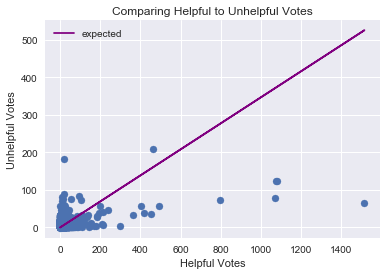

In [275]:
# I decided to use the reduced arrays. 
# They ignore votes where no helpful or unhelpful vote has been cast
x = np_sub_helpfulVotes_reduced
y = np_sub_totalVotes_reduced - np_sub_helpfulVotes_reduced

plt.scatter(x,y)
plt.title('Comparing Helpful to Unhelpful Votes')
plt.xlabel('Helpful Votes')
plt.ylabel('Unhelpful Votes')

expectedLine, = plt.plot(x, (1-percentage_helpful)/percentage_helpful*x,'purple', label='expected')
plt.legend(handles=[expectedLine])
plt.show()

This plot is very clustered near the origin. The pattern is less clear.

## Helpful v Unhelpful Subplots

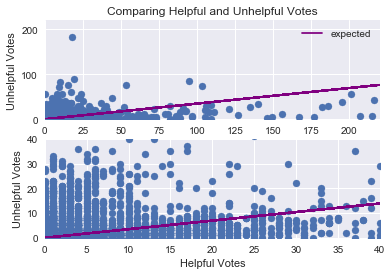

In [276]:
plt.subplot(2,1,1)
x = np_sub_helpfulVotes_reduced
y = np_sub_totalVotes_reduced - np_sub_helpfulVotes_reduced
plt.scatter(x,y)
expectedLine, = plt.plot(x, (1-percentage_helpful)/percentage_helpful*x,'purple', label='expected')
plt.legend(handles=[expectedLine])
plt.xlabel('Helpful Votes')
plt.ylabel('Unhelpful Votes')
plt.title('Comparing Helpful and Unhelpful Votes')
plt.xlim(0,220)
plt.ylim(0,220)

plt.subplot(2,1,2)
x = np_sub_helpfulVotes_reduced
y = np_sub_totalVotes_reduced - np_sub_helpfulVotes_reduced
plt.scatter(x,y)
plt.plot(x, (1-percentage_helpful)/percentage_helpful*x,'purple')
plt.xlabel('Helpful Votes')
plt.ylabel('Unhelpful Votes')
plt.xlim(0,40)
plt.ylim(0,40)

plt.tight_layout
plt.show()


The pattern indcates that as helpful votes go up, unhelpful votes go down.

# Explore Length of Review

In [90]:
type(df_sub['reviewText'][0])

str

In [91]:
len(df_sub['reviewText'][0])

129

### Compute Mean Length of Review

In [268]:
length_of_review = []
for item, row in df_sub.iterrows():
    length_of_review.append(len(row['reviewText'].split()))
np_length_of_review = np.array(length_of_review)
print('Mean Review Length:',np_length_of_review.mean())

Mean Review Length: 144.5853


145 words is roughly 10 sentences. I thought it might be lower.

### Turn Length of Review into Column

In [104]:
df_sub['reviewLength']=np_length_of_review

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [257]:
df_sub.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,reviewLength,TotalVotes,helpfulVotes,totalVotes
0,000100039X,"[0, 0]",5.0,Spiritually and mentally inspiring! A book tha...,"12 16, 2012",A10000012B7CGYKOMPQ4L,Adam,Wonderful!,1355616000,22,0,0,0
1,000100039X,"[0, 2]",5.0,This is one my must have books. It is a master...,"12 11, 2003",A2S166WSCFIFP5,"adead_poet@hotmail.com ""adead_poet@hotmail.com""",close to god,1071100800,49,2,0,2
2,000100039X,"[0, 0]",5.0,This book provides a reflection that you can a...,"01 18, 2014",A1BM81XB4QHOA3,"Ahoro Blethends ""Seriously""",Must Read for Life Afficianados,1390003200,40,0,0,0
3,000100039X,"[0, 0]",5.0,I first read THE PROPHET in college back in th...,"09 27, 2011",A1MOSTXNIO5MPJ,Alan Krug,Timeless for every good and bad time in your l...,1317081600,154,0,0,0
4,000100039X,"[7, 9]",5.0,A timeless classic. It is a very demanding an...,"10 7, 2002",A2XQ5LZHTD4AFT,Alaturka,A Modern Rumi,1033948800,150,9,7,9


This appears to have worked despite the warning.

### Scatter Plot: Length of Review v Percentage of Helpful Votes

Since percentage of helpful votes is only relevant when votes have been cast, I need a reduced array of review length to match.

In [270]:
length_of_review_reduced = []
for item, row in df_sub.iterrows():
    if row['helpful'][1] != 0:
        length_of_review_reduced.append(len(row['reviewText'].split()))
np_length_of_review_reduced = np.array(length_of_review_reduced)
print('Mean Review Length:', np_length_of_review_reduced.mean())

Mean Review Length: 164.79332961205694


This is interesting. Reviews that are receiving votes are generally longer than those that aren't.

#### Generating Plot

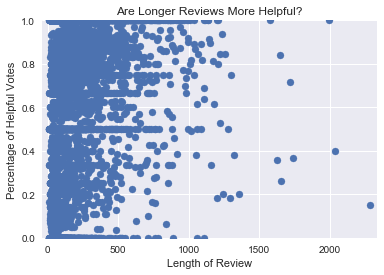

In [333]:
x = np_length_of_review_reduced
y = np_sub_helpfulVotes_reduced/np_sub_totalVotes_reduced
plt.title('Are Longer Reviews More Helpful?')
plt.ylim(0,1)
plt.xlabel('Length of Review')
plt.ylabel('Percentage of Helpful Votes')
plt.scatter(x,y)
plt.show()

 There does not appear to be a strong correlation between length of review and helpful percentage. This surprises me a bit. I had figured longer reviews would be considered more helpful. (Correlations will be computed later.) It appears that users are less likely to find reviews helpful that are unusually long.

#### Generating 2nd plot for comparison

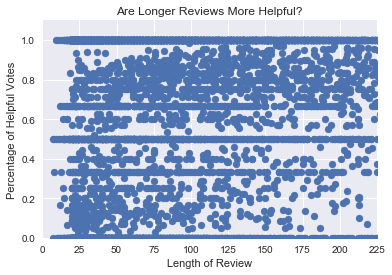

In [277]:
x = np_length_of_review_reduced
y = np_sub_helpfulVotes_reduced/np_sub_totalVotes_reduced
plt.title('Are Longer Reviews More Helpful?')
plt.xlim(0,225)
plt.ylim(0,1.1)
plt.xlabel('Length of Review')
plt.ylabel('Percentage of Helpful Votes')
plt.scatter(x,y)
plt.show()

There does appear to be a positive correlation. The longer the review, the more likely it is that users find the review helpful.

#### A third plot

I tend to check a lot of plots to try and find something striking. I'm only saving those that add something new.

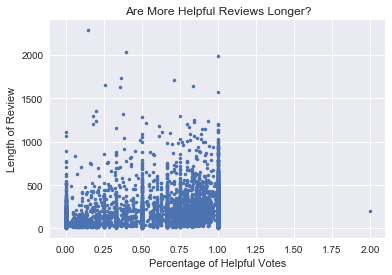

In [296]:
y = np_length_of_review_reduced
x = np_sub_helpfulVotes_reduced/np_sub_totalVotes_reduced
plt.title('Are More Helpful Reviews Longer?')
plt.ylabel('Length of Review')
plt.xlabel('Percentage of Helpful Votes')
plt.plot(x, y, marker='.', linestyle='none')
plt.show()

An error! The percentage of helpful votes should not be over 100. Should I delete the point? Change the data?

#### Finding the culprit

In [207]:
df_sub_reduced.loc[df_sub_reduced.helpfulPercentage==2.00]

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,reviewLength,TotalVotes,helpfulVotes,totalVotes,helpfulPercentage
1533,0002007770,"[2, 1]",3.0,I was surprised to find that Water for Elephan...,"03 5, 2009",A1FJC36TGXG20D,"Jessica Bender ""aglowgal""","Exciting, boring, then exciting again.",1236211200,202,1,2,1,2.0


I think deleting that data point might be best here. It's unclear whether [2,1] should be [1,2] or [2,2]. I'll leave it in for now.

# Digging Deeper Into the Data

## Playing Around With Percentiles

In [290]:
percentiles = np.array([25, 50, 75, 97, 99])
review_percentiles = np.percentile(df_sub_reduced.helpfulVotes, percentiles)
print('Percentiles of Helpful Votes:\n')
print(review_percentiles)
print('')
print('[.25, .50, .75, .97, .99]')

Percentiles of Helpful Votes:

[ 1.  1.  4. 25. 53.]

[.25, .50, .75, .97, .99]


Wow. Half of the reviews receiving helpful votes only get 1!

In [293]:
percentiles = np.array([25, 50, 75, 97, 99])
review_percentiles = np.percentile(df_sub_reduced.totalVotes, percentiles)
print('Percentiles of Total Votes:\n')
print(review_percentiles)
print('')
print('[.25, .50, .75, .97, .99]')

Percentiles of Total Votes:

[ 1.    3.    8.   35.   71.35]

[.25, .50, .75, .97, .99]


This is interesting. Comparing total with helpful suggests that more votes results in more helpful votes. Not sure I can put off correlations much longer. First, I want to quickly check the variation.

In [294]:
np.var(df_sub_reduced.totalVotes)

1477.345995046304

In [295]:
np.std(df_sub_reduced.totalVotes)

38.43625885861297

In [279]:
df_sub_reduced.totalVotes.describe()

count    7166.000000
mean        8.662015
std        38.438941
min         1.000000
25%         1.000000
50%         3.000000
75%         8.000000
max      1581.000000
Name: totalVotes, dtype: float64

## Correlation Coefficient

### Define Function

In [175]:
def pearson_r(x,y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

In [ ]:
# Plot the ECDF
_ = plt.plot(df_sub.overall, y_vers, '.')
plt.margins(0.02)
_ = plt.xlabel('book rankings')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_vers, review_percentiles/100, marker='D', color='red',
         linestyle='none')

# Show the plot
plt.show()

### Correlation Coefficient: Length of Review, and Percentage of Helpful Votes.

In [178]:
pearson_r(np_length_of_review_reduced, np_sub_helpfulVotes_reduced/np_sub_totalVotes_reduced)

0.1702067069948573

It's positive, but not strong, as the graphs indicated.

### Correlation Coefficient: Total Votes, and Helpful Votes.

In [179]:
pearson_r(np_sub_totalVotes_reduced, np_sub_helpfulVotes_reduced)

0.9872006480356191

It's amazing! I like double-checking anything with that strong of a correlation.

#### Confirm Total Votes and Helpful Votes Plot

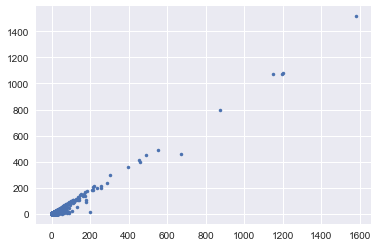

In [182]:
plt.plot(df_sub.totalVotes, df_sub.helpfulVotes, marker = '.', linestyle='none')

We have seen this one before.

### Correlation Coefficient: Helpful Percentage, and Star Ranking.

In [200]:
pearson_r(df_sub_reduced.helpfulPercentage, df_sub_reduced.overall)

0.04406577411491016

This correlation is low enough to be dismissed.

## Creating Sub-Data Frame with all Useful Columns

In [306]:
df_sub_reduced = df_sub.loc[df_sub.totalVotes != 0]

The 'reduced' Data Frame will only include row with votes cast.

In [308]:
df_sub_reduced.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,reviewLength,helpfulVotes,totalVotes
1,000100039X,"[0, 2]",5.0,This is one my must have books. It is a master...,"12 11, 2003",A2S166WSCFIFP5,"adead_poet@hotmail.com ""adead_poet@hotmail.com""",close to god,1071100800,49,0,2
4,000100039X,"[7, 9]",5.0,A timeless classic. It is a very demanding an...,"10 7, 2002",A2XQ5LZHTD4AFT,Alaturka,A Modern Rumi,1033948800,150,7,9
14,000100039X,"[1, 1]",5.0,I discovered The Prophet fifty years ago in co...,"01 23, 2013",A19N3FCQCLJYUA,Amazon Customer,A book everyone &#34;should&#34; read,1358899200,162,1,1
15,000100039X,"[1, 1]",5.0,Can't say enough about Kahlil Gibran's work am...,"06 27, 2012",A3FFNE1DR5SI1W,A. Morelli,phenomenal piece of literature!,1340755200,71,1,1
17,000100039X,"[3, 5]",5.0,"Anything I've read by Gibran is, in my mind, f...","11 16, 2005",A2X4HE21JTAL98,Antiquarian,Flawless,1132099200,80,3,5


The totalVotes column is never 0 as expected.

In [197]:
df_sub_reduced.shape

(7166, 13)

### Add a column for helpful percentage

In [198]:
df_sub_reduced['helpfulPercentage'] = df_sub_reduced.helpfulVotes/df_sub_reduced.totalVotes

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [199]:
df_sub_reduced.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,reviewLength,TotalVotes,helpfulVotes,totalVotes,helpfulPercentage
1,000100039X,"[0, 2]",5.0,This is one my must have books. It is a master...,"12 11, 2003",A2S166WSCFIFP5,"adead_poet@hotmail.com ""adead_poet@hotmail.com""",close to god,1071100800,49,2,0,2,0.000000
4,000100039X,"[7, 9]",5.0,A timeless classic. It is a very demanding an...,"10 7, 2002",A2XQ5LZHTD4AFT,Alaturka,A Modern Rumi,1033948800,150,9,7,9,0.777778
14,000100039X,"[1, 1]",5.0,I discovered The Prophet fifty years ago in co...,"01 23, 2013",A19N3FCQCLJYUA,Amazon Customer,A book everyone &#34;should&#34; read,1358899200,162,1,1,1,1.000000
15,000100039X,"[1, 1]",5.0,Can't say enough about Kahlil Gibran's work am...,"06 27, 2012",A3FFNE1DR5SI1W,A. Morelli,phenomenal piece of literature!,1340755200,71,1,1,1,1.000000
17,000100039X,"[3, 5]",5.0,"Anything I've read by Gibran is, in my mind, f...","11 16, 2005",A2X4HE21JTAL98,Antiquarian,Flawless,1132099200,80,5,3,5,0.600000
18,000100039X,"[1, 1]",5.0,"Cool book, I really like the quality of the pr...","02 15, 2012",ARDQ9KNB8K22N,Anwar,"""The Prophet"" is cool",1329264000,181,1,1,1,1.000000
19,000100039X,"[3, 3]",5.0,"This book is everything that is simple, delica...","10 13, 2003",A27ZH1AQORJ1L,"anybody else or ""amanuet""",Enchanting,1066003200,54,3,3,3,1.000000
21,000100039X,"[2, 3]",5.0,I would have to say that this is the best book...,"02 24, 2001",A26GKZPS079GFF,Areej,Touches my heart.. again and.. again...,982972800,41,3,2,3,0.666667
22,000100039X,"[1, 4]",3.0,"Its a thin book, very readable and has interes...","07 13, 2000",AENNW2G826191,Ashish A,Good Read,963446400,54,4,1,4,0.250000
23,000100039X,"[2, 9]",2.0,I read this about a year ago and can't recall ...,"03 21, 2008",A1KQ80Y692CDOI,Atown,Eloquent,1206057600,134,9,2,9,0.222222


Since reviewerID is provided, reviewerName is extraneous. It exists in the original dataFrame so it's available if I need it to cross-check any discrepancies.

In [312]:
del df_sub_reduced['reviewerName']

## Initial Summary

I am looking for criteria to rank the helpfulness of reviews and reviewers. The next logical step is to group the data by reviewerID and look for any trends. The data clearly shows that users are more likely to vote for a review if they find it helpful. This should prove instrumental for training data to determine the helpfulness of a given review. The length of the review can also be used, but it's influence should be limited since its correlation with the helpful percentage is 0.17.

## Questions Going Forward

1) What other criterion can be used to determine the helpfulness of reviews?

2) What model can I create to generate a single number to rank how helpful reviews are?

3) What trends will grouping by reviewerID reveal?

4) What will grouping by time series stamp reveal?

5) Are the words themselves, or sentence length of each review worth examining?